In [19]:
from material_class import Material, Fit, DataSet
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

from scipy.special import erf

from fit_types import Nppoly, polylog, loglog_func, linear_fit
from tc_utils import *

In [21]:
material_of_interest = os.listdir("lib")
def set_parent(search_string, parent_string):
    for material in material_of_interest:
        if material.startswith(search_string):
            material_folder = os.path.join("lib", material)
            pickle_file = os.path.join(material_folder, "material.pkl")
            # Load the material of interest from the saved pickle file
            testmat = pickle.load(open(pickle_file, "rb"))
            testmat.parent=parent_string
            with open(pickle_file, "wb") as f:
                pickle.dump(testmat, f)

set_parent("Aluminum_", "Aluminum")
set_parent("CFRP_", "CFRP")
set_parent("G10_", "G10_parent")
set_parent("Graphite_", "Graphite")
set_parent("Nickel_Steel_", "Nickel_Steel")
set_parent("Polystyrene_", "Polystyrene")
set_parent("Polyurethane_", "Polyurethane")
set_parent("PVC_", "PVC")
set_parent("Stainless_Steel_", "Stainless_Steel")
set_parent("Wood_", "Wood")


Loading Ti6Al4V from pickle
lib\Ti6Al4V
[(0.0566, 1173.15), (23.0, 300.0)]
powerlaw


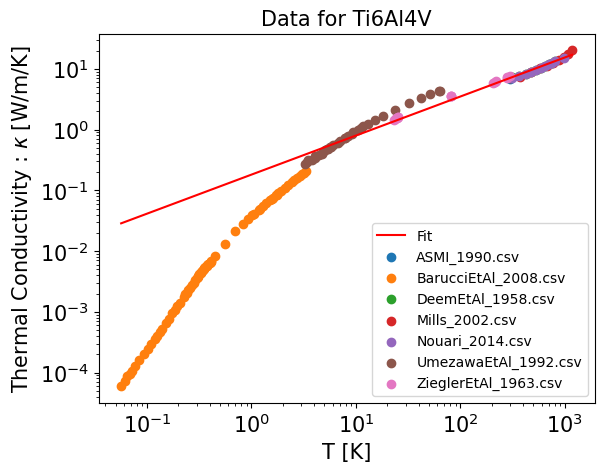

'\n1. Read the NIST csv\n2. load the material object\n3. material.add_fits(...)\n\n\n\n'

In [18]:
material_of_interest = "Ti6Al4V"


material_folder = os.path.join("lib", material_of_interest)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {material_of_interest} from pickle")
# Load the material of interest from the saved pickle file
testmat = pickle.load(open(pickle_file, "rb"))
print(testmat.folder)
print([fit.range for fit in testmat.fits])
# print(testmat.fits[0].fit_type)
testmat.update_fit("powerlaw")
testmat.plot_data_fit()
plt.show()
"""
1. Read the NIST csv
2. load the material object
3. material.add_fits(...)



"""
# print(fits_to_df(testmat.fits))
# print(mat_to_csv(testmat))
# with open(pickle_file, "wb") as f:
#     pickle.dump(testmat, f)

In [3]:
from astropy import units as u
T_cold = 100 *u.mK
T_hot = 4.0 * u.K
tc_at_Tcold = testmat.fits[0].calc_tc(T_cold)
integral, error = testmat.fits[0].tc_integral(T_cold, T_hot)
print(f"Integral: {integral}, Error: {error}")

Integral: 0.17560052063728027 W / m, Error: 6.959112320378131e-09 W / m


# Now that I have done all the changes I want to do, I will save the material again
with open(pickle_file, "wb") as f:
    pickle.dump(testmat, f)